In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append('../src/')
import stochastic_benchmark

import dill
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import glob
import seaborn.objects as so

import bootstrap
import df_utils
import interpolate
import random_exploration
import sequential_exploration
import names
import stats
import success_metrics
import training

from setups import *

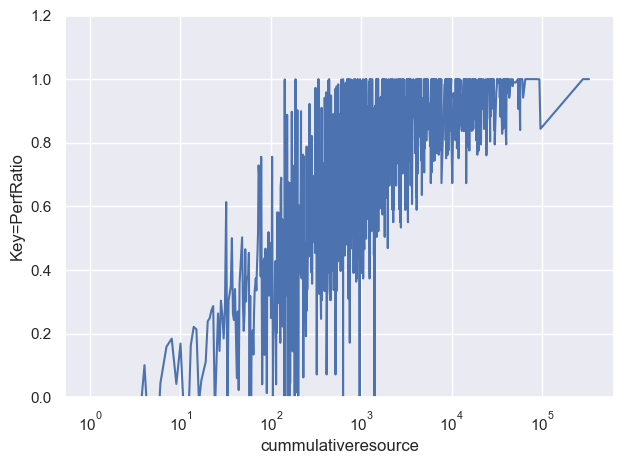

In [39]:
cumm_df = df_utils.eval_cumm(v, sb.instance_cols, 'resource', 'Key=PerfRatio', 1 )

small = cumm_df[(cumm_df['N'] == 1) & (cumm_df['n'] == 50) & (cumm_df['idx'] == 2)]

p = (
    so.Plot(data=cumm_df, x='cummulativeresource', y=keyname)
    .add(so.Line(), so.Agg('median'))
    .scale(x='log').limit(y=(0., 1.2))
    )
p.show()

In [109]:
k = 'stats'
v = sb.projections[k]
key = 'PerfRatio'
keyname = names.param2filename({'Key': key}, '')
cumm_df = v.copy()
cumm_df['TotalResource'] = cumm_df['resource']
display(v)

,N,n,idx,train,sweeps,resource,Key=Response,ConfInt=lower_Key=Response,ConfInt=upper_Key=Response,Key=PerfRatio,...,ConfInt=lower_Key=MeanTime,ConfInt=upper_Key=MeanTime,Key=RTT,ConfInt=lower_Key=RTT,ConfInt=upper_Key=RTT,boots,order,distance_scaled,sweeps_scaled,sweeps_rec
0,1,50,2,0,1,1.0,686.763375,430.091854,943.434896,-85.845422,...,0.000023,0.000023,NaN,NaN,NaN,1.0,16.0,0.000000e+00,0.000000,1.0
1,1,110,3,0,1,1.0,4194.712938,3159.423046,5230.002829,-392.487760,...,0.000101,0.000101,NaN,NaN,NaN,1.0,21.0,0.000000e+00,0.000000,1.0
2,2,10,1,0,1,1.0,7.315500,0.296099,14.334901,-0.975400,...,0.000002,0.000002,NaN,NaN,NaN,1.0,20.0,0.000000e+00,0.000000,1.0
3,2,30,2,0,1,1.0,122.117500,67.437975,176.797025,-14.802121,...,0.000009,0.000009,NaN,NaN,NaN,1.0,9.0,0.000000e+00,0.000000,1.0
4,2,90,3,0,1,1.0,1845.393375,1339.976751,2350.809999,-84.120496,...,0.000081,0.000081,NaN,NaN,NaN,1.0,24.0,0.000000e+00,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,4,10,2,0,117,56043.0,-8.000000,-8.000000,-8.000000,1.000000,...,0.000029,0.000029,0.000467,0.000425,0.000511,479.0,NaN,0.000000e+00,0.001502,117.0
2874,7,130,3,0,117,56043.0,-13.162500,-18.550412,-7.774588,0.679355,...,0.000839,0.000839,NaN,NaN,NaN,479.0,NaN,0.000000e+00,0.001502,117.0
2875,22,30,2,0,117,56043.0,-8.250000,-8.250000,-8.250000,1.000000,...,0.000102,0.000102,0.014416,0.010997,0.018487,479.0,NaN,0.000000e+00,0.001502,117.0
2876,8,70,3,0,562,269198.0,-39.625000,-39.625000,-39.625000,1.000000,...,0.001428,0.001428,0.152578,0.117842,0.181997,479.0,NaN,0.000000e+00,0.007769,562.0


100%|██████████████████████████████████████████| 2728/2728 [00:21<00:00, 125.80it/s]


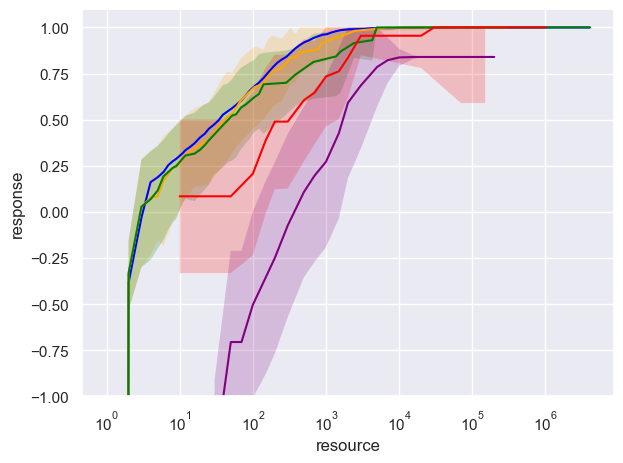

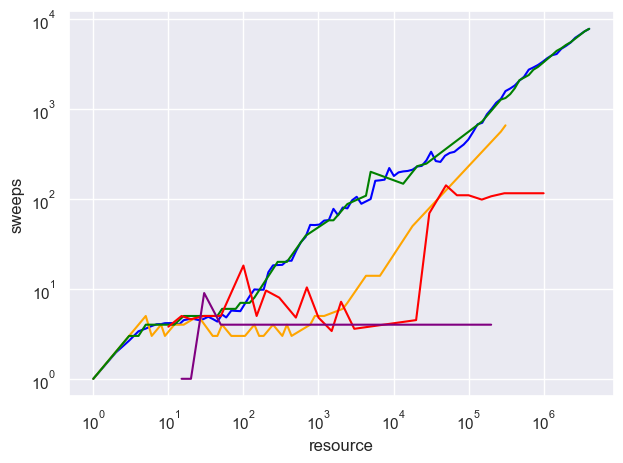

In [22]:
sb = max_clique_setup(0.5)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(-1., 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

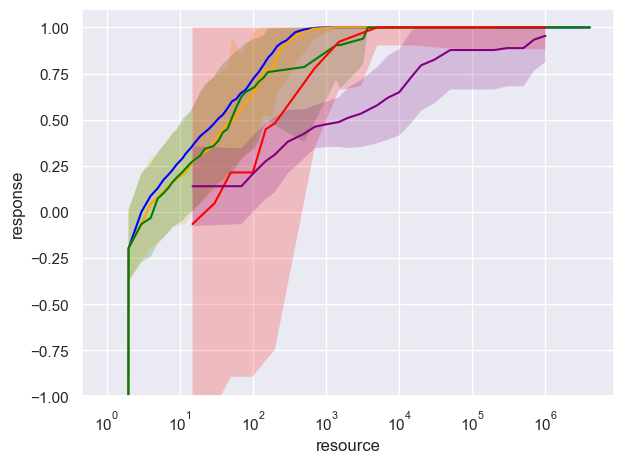

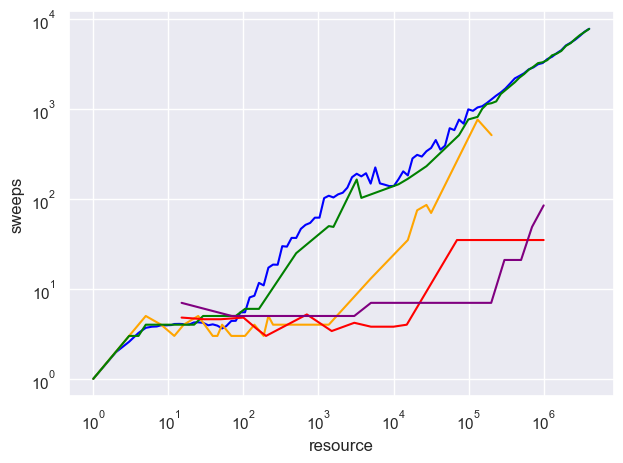

In [21]:
sb = max_clique_setup(0.25)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(-1., 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

100%|██████████████████████████████████████████| 2728/2728 [00:13<00:00, 204.91it/s]


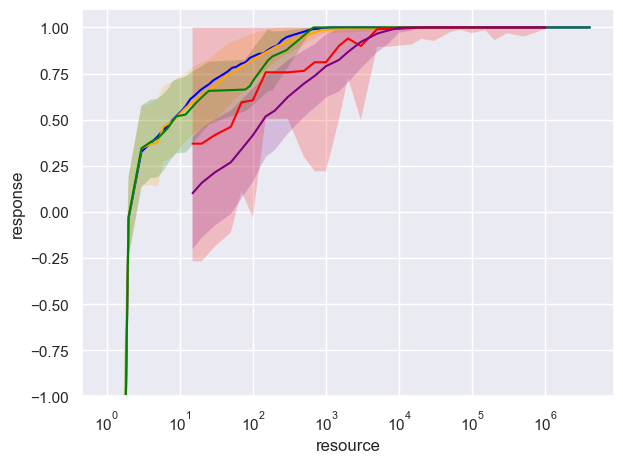

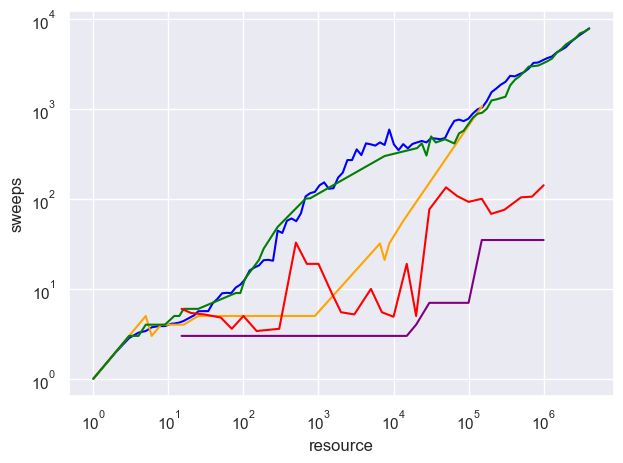

In [23]:
sb = max_clique_setup(0.75)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(-1., 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

In [96]:
eval_df.iloc[4]['resource'] == eval_df.iloc[5]['resource']

True

calling monotone
dropping duplicates


resource           5.000000
swe                5.000000
rep               10.000000
pcold             10.540000
phot              39.200000
response           0.867920
response_lower     0.850728
response_upper     0.883404
Name: 4, dtype: float64

resource           6.000000
swe                5.000000
rep                5.000000
pcold              0.360000
phot              31.400000
response           0.851482
response_lower     0.831751
response_upper     0.871126
Name: 5, dtype: float64

['index', 'swe', 'rep', 'pcold', 'phot', 'response', 'response_lower', 'response_upper']


,resource,response,response_lower,response_upper
0,1.0,0.767768,0.733671,0.802622
1,2.0,0.823299,0.801460,0.846288
2,3.0,0.853740,0.835117,0.872068
3,4.0,0.857019,0.839323,0.875045
4,5.0,0.867920,0.850728,0.883404
...,...,...,...,...
81,82254323.0,1.000000,1.000000,1.000000
82,102064677.0,1.000000,1.000000,1.000000
83,126646212.0,1.000000,1.000000,1.000000
84,157148030.0,1.000000,1.000000,1.000000


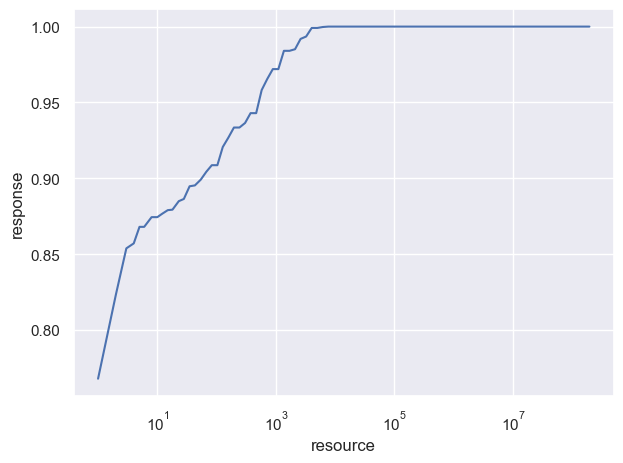

In [105]:
experiment = sb.experiments[1]
_, eval_df = experiment.evaluate_monotone()
display(eval_df)
p = so.Plot(data=eval_df, x='resource', y='response').add(so.Line()).scale(x='log')
p.show()

/home/robin/stochastic-benchmark/notebooks/../src/interpolate.py:36: UserWarning: Resource proportional parameter, sweep, is not in the parameters. Removing.
  warnings.warn(warn_str)
/home/robin/stochastic-benchmark/notebooks/../src/interpolate.py:52: UserWarning: Resource value type log does not support passing in values. Removing.
  warnings.warn(warn_str)


Interpolating results with parameters:  InterpolationParameters(resource_fcn=<function mod_wishart_setup.<locals>.resource_fcn at 0x7fe6b340e790>, resource_proportional_parameters=['replica'], parameters=['swe', 'rep', 'pcold', 'phot'], resource_value_type='log', resource_values=[], group_on='instance', min_boots=1)


100%|█████████████████████████████| 17309/17309 [02:40<00:00, 107.76it/s]


Computing training stats


100%|██████████████████████████| 339746/339746 [04:52<00:00, 1163.15it/s]


Computing testing stats


100%|████████████████████████████████████| 40/40 [00:53<00:00,  1.34s/it]


Not enough test data for sequential search. Evaluating on train.


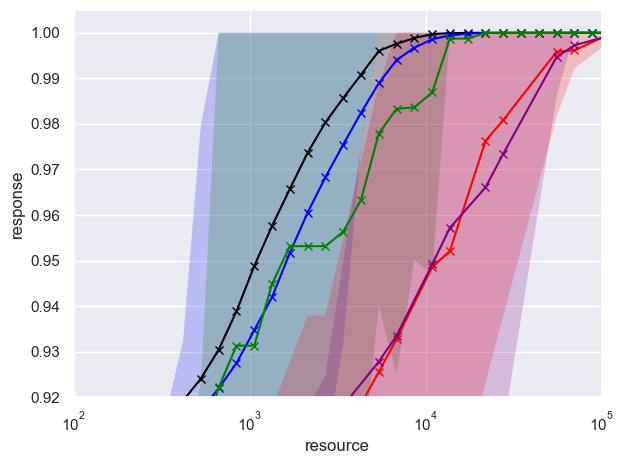

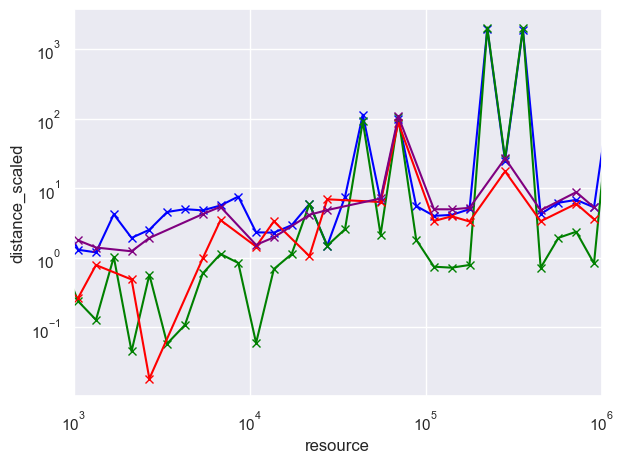

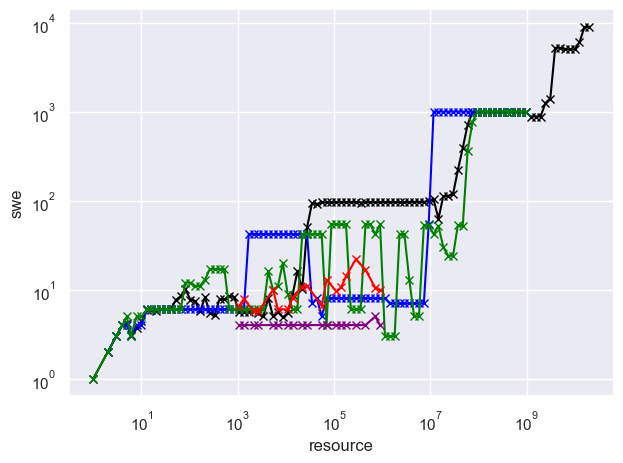

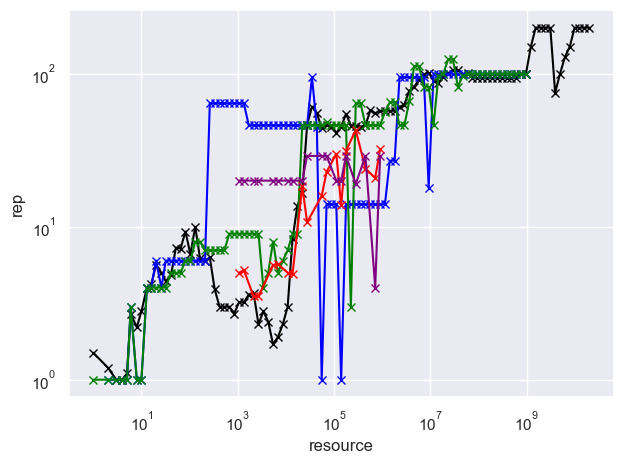

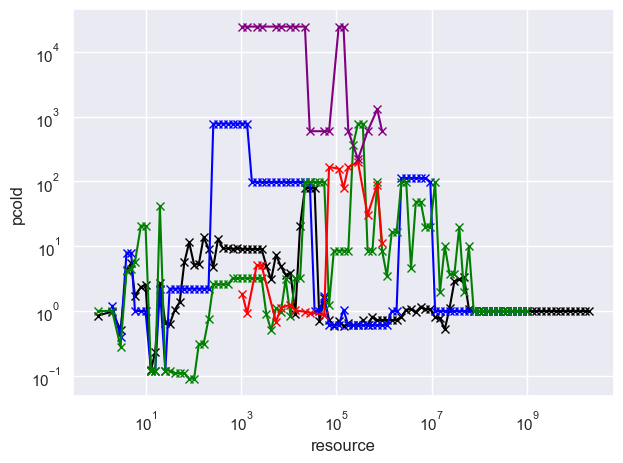

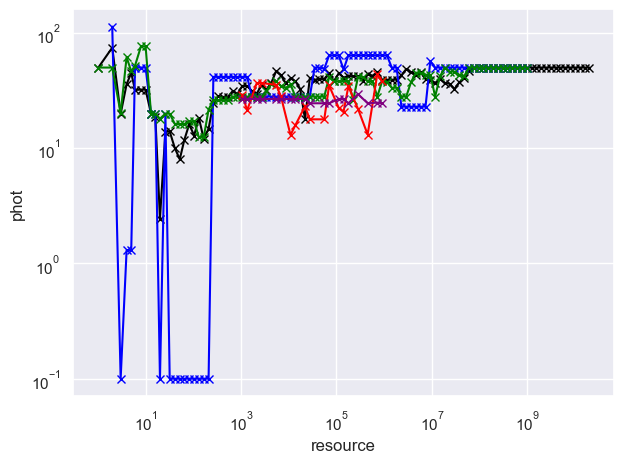

In [108]:
sb = mod_wishart_setup(50, '0.80', 2)
p = sb.plot_performance()
p = p.scale(x='log').limit(x=(10**2,  10**5), y=(0.92, 1.005))
p.show()
p.save(os.path.join(sb.here.plots, 'performance_plot.png'))

p = sb.plot_parameters_distance()
p = p.scale(x='log', y='log').limit(x=(10**3,  10**6))
p.show()
p.save(os.path.join(sb.here.plots, 'parameters_distance.png'))

p_dict = sb.plot_parameters()
for k, p in p_dict.items():
    p = p.scale(x='log', y='log')
    p.show()
    p.save(os.path.join(sb.here.plots, 'parameters_{}.png'.format(k)))

Not enough test data for sequential search. Evaluating on train.


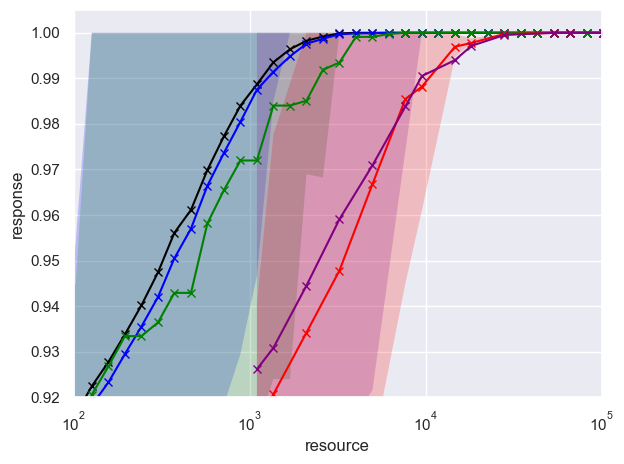

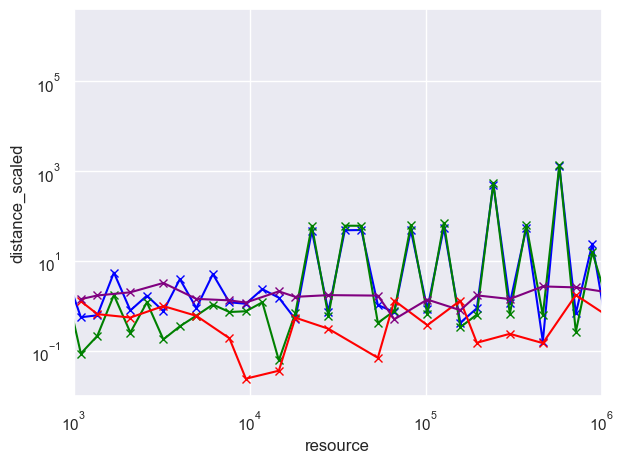

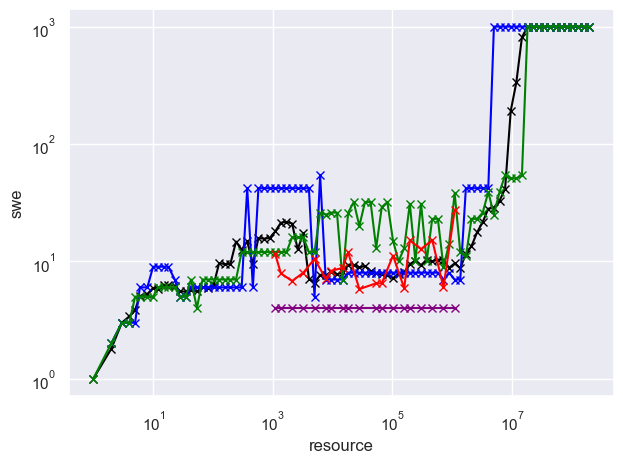

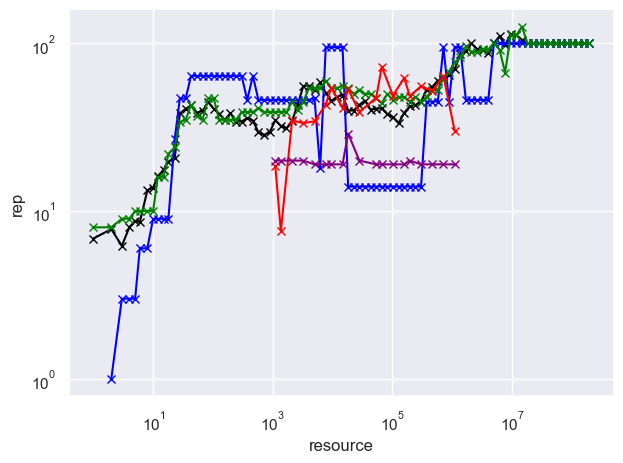

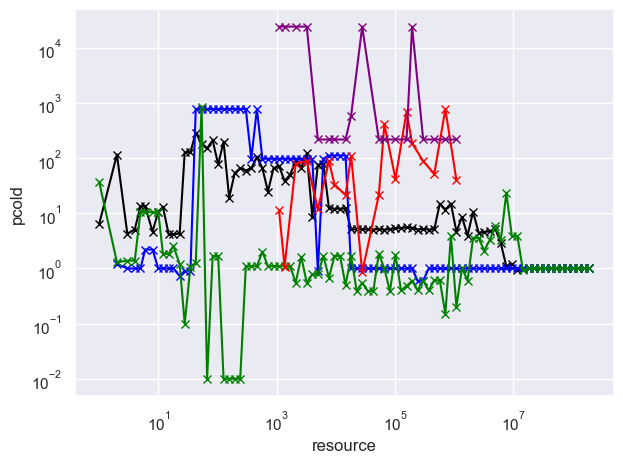

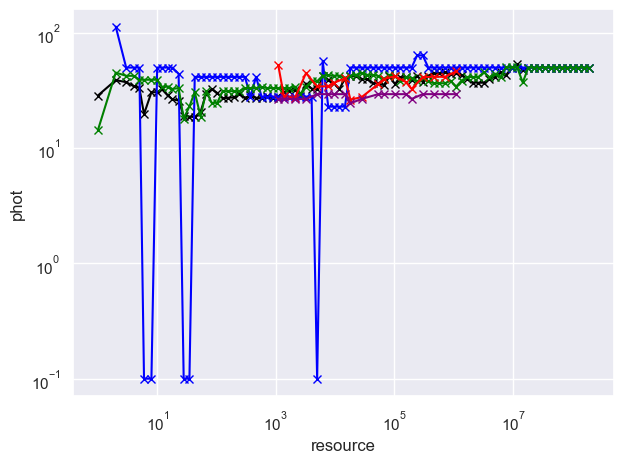

In [107]:
sb = mod_wishart_setup(50, '0.80', 10)
p = sb.plot_performance()
p = p.scale(x='log').limit(x=(10**2,  10**5), y=(0.92, 1.005))
p.show()
p.save(os.path.join(sb.here.plots, 'performance_plot.png'))

p = sb.plot_parameters_distance()
p = p.scale(x='log', y='log').limit(x=(10**3,  10**6))
p.show()
p.save(os.path.join(sb.here.plots, 'parameters_distance.png'))

p_dict = sb.plot_parameters()
for k, p in p_dict.items():
    p = p.scale(x='log', y='log')
    p.show()
    p.save(os.path.join(sb.here.plots, 'parameters_{}.png'.format(k)))

Not enough test data for sequential search. Evaluating on train.


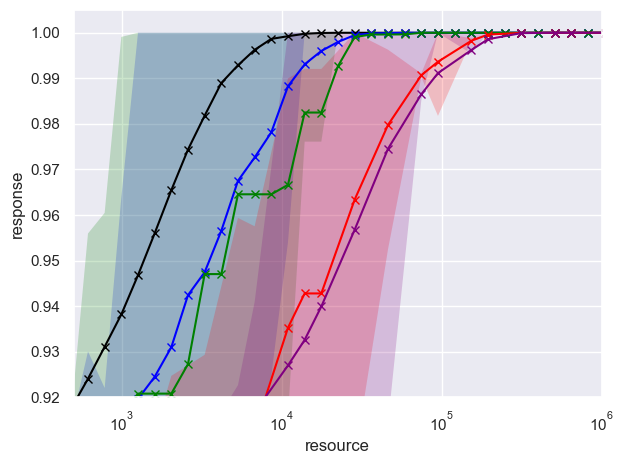

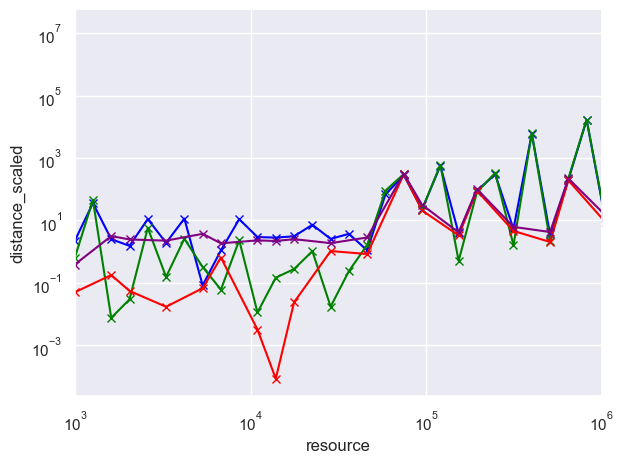

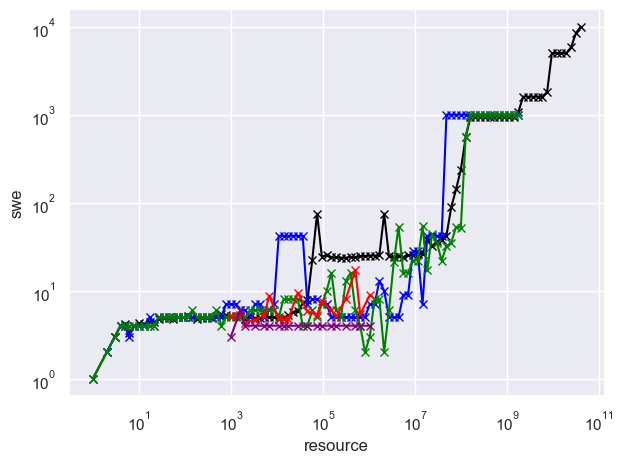

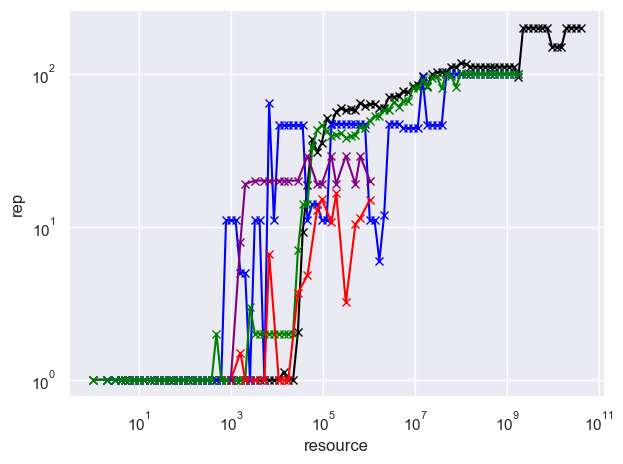

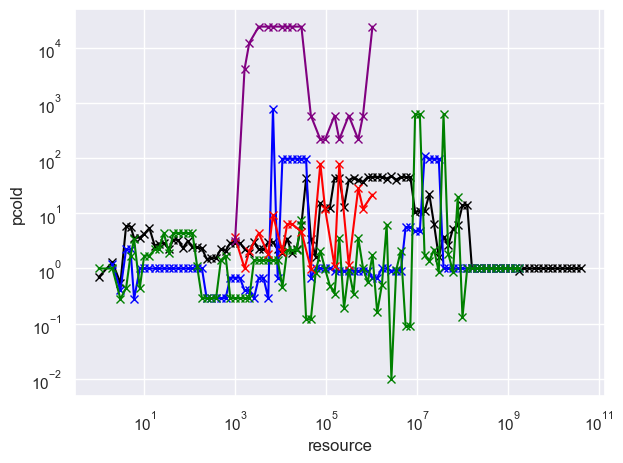

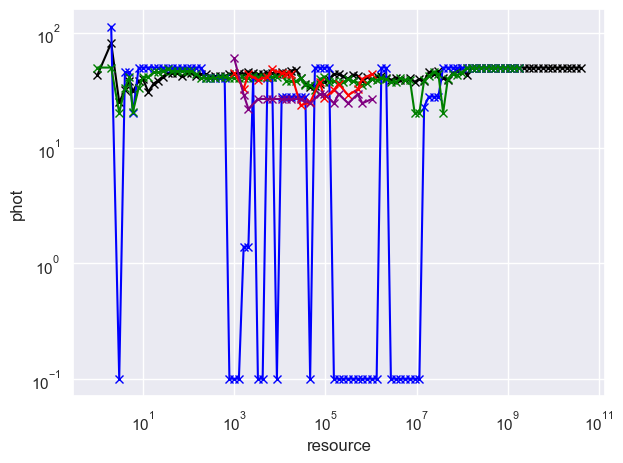

In [110]:
sb = wishart_setup(50, '0.80')
p = sb.plot_performance()
p = p.scale(x='log').limit(x=(5*10**2,  10**6), y=(0.92, 1.005))
p.show()
p.save(os.path.join(sb.here.plots, 'performance_plot.png'))

p = sb.plot_parameters_distance()
p = p.scale(x='log', y='log').limit(x=(10**3,  10**6))
p.show()
p.save(os.path.join(sb.here.plots, 'parameters_distance.png'))

p_dict = sb.plot_parameters()
for k, p in p_dict.items():
    p = p.scale(x='log', y='log')
    p.show()
    p.save(os.path.join(sb.here.plots, 'parameters_{}.png'.format(k)))

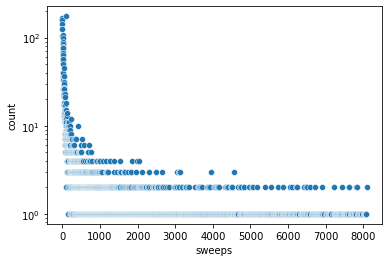

In [42]:
small_results = df[df['boots'] == 1]
count_sweeps = small_results.groupby('sweeps').size()
count_sweeps.name = 'count'
count_sweeps = count_sweeps.to_frame()
sns.scatterplot(x='sweeps', y='count', data = count_sweeps)
ax = plt.gca()
ax.set_yscale('log')

100%|██████████████████████████████████████████| 7600/7600 [01:03<00:00, 119.02it/s]


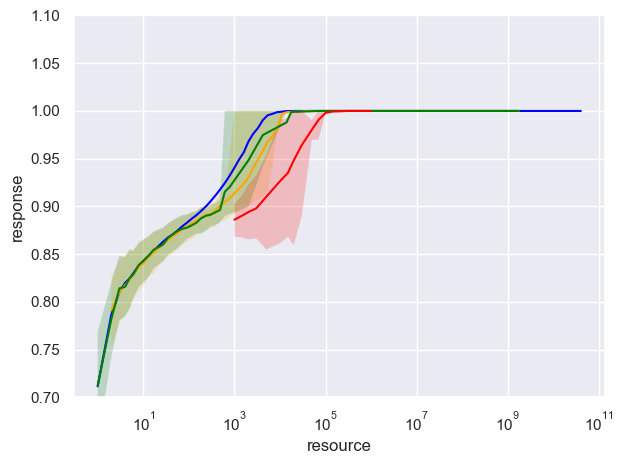

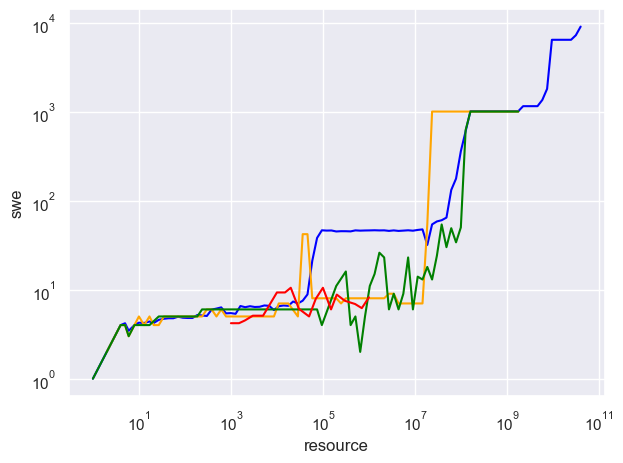

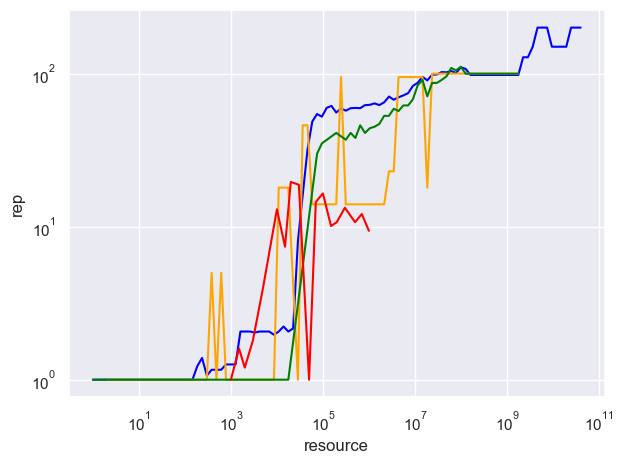

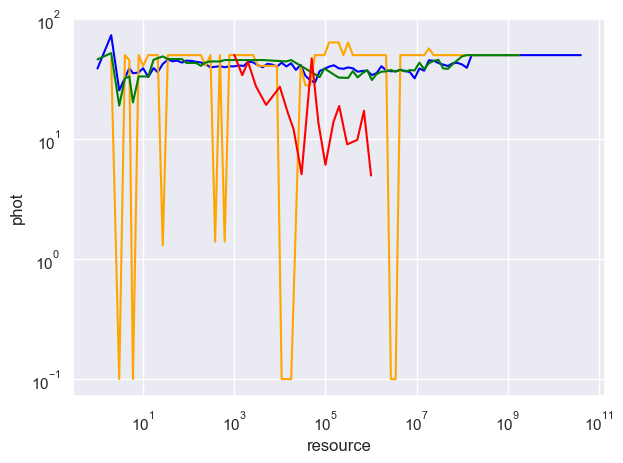

In [30]:
sb = wishart_setup(50, '0.80', 'nopcold')
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.7, 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

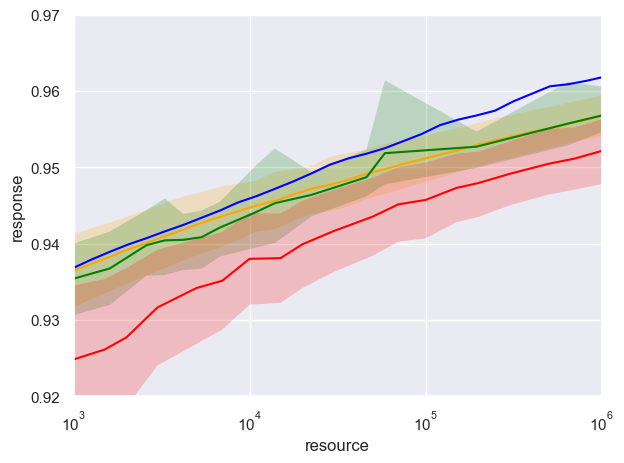

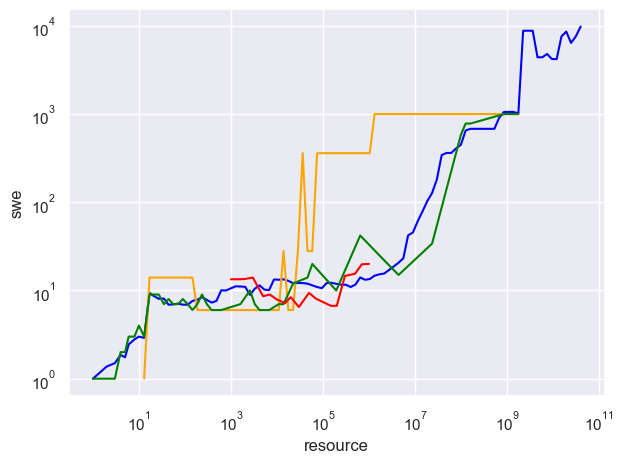

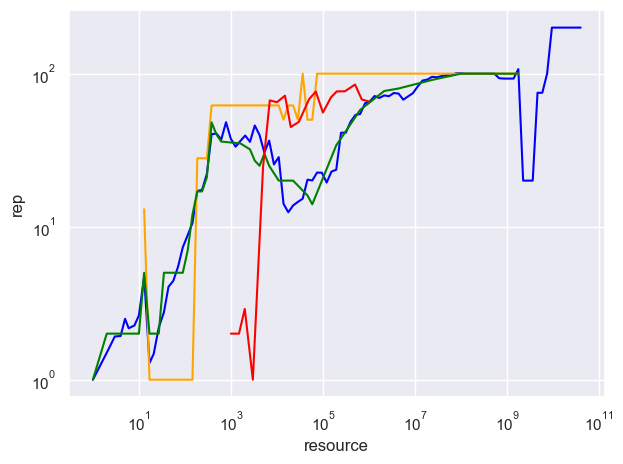

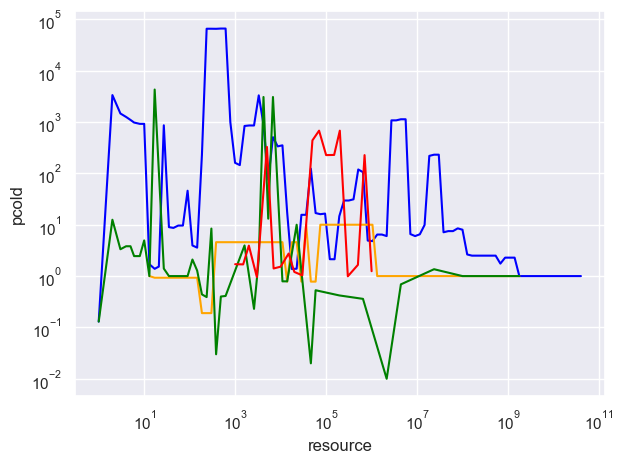

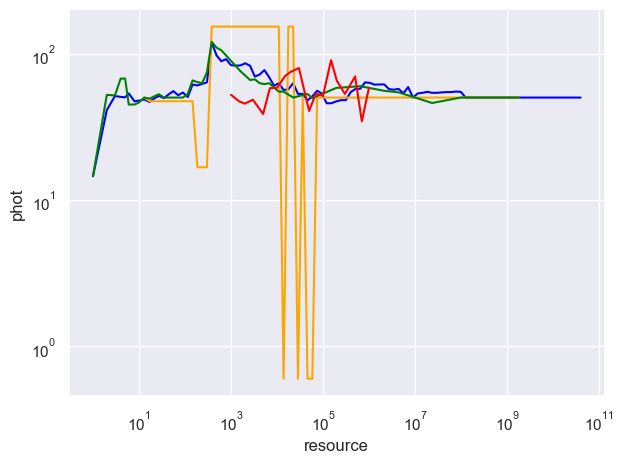

In [34]:
sb = wishart_setup(100, '0.50')
p = sb.plot_performance()
p = p.scale(x='log').limit(x=(10**3, 10**6), y=(0.92, 0.97))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

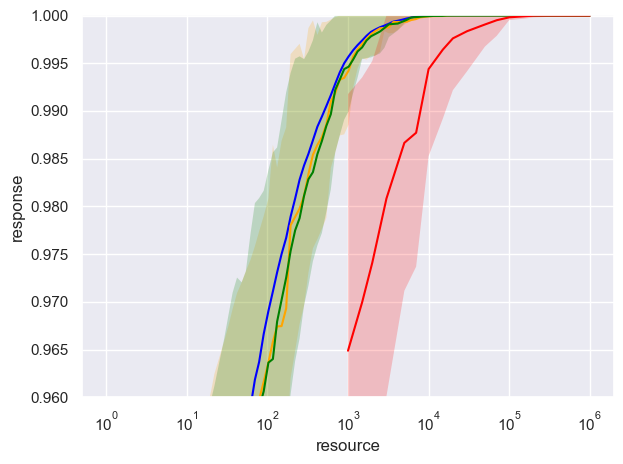

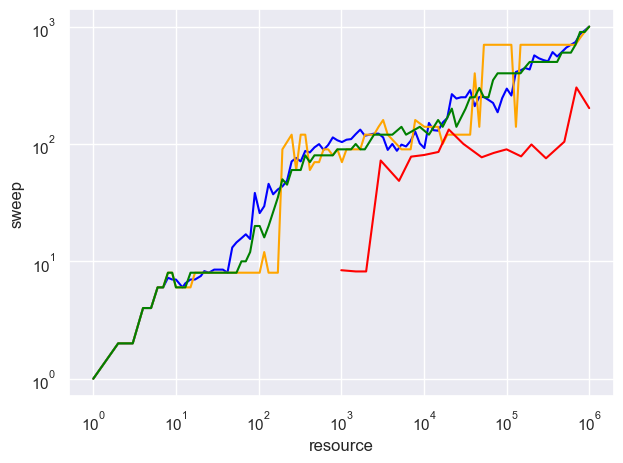

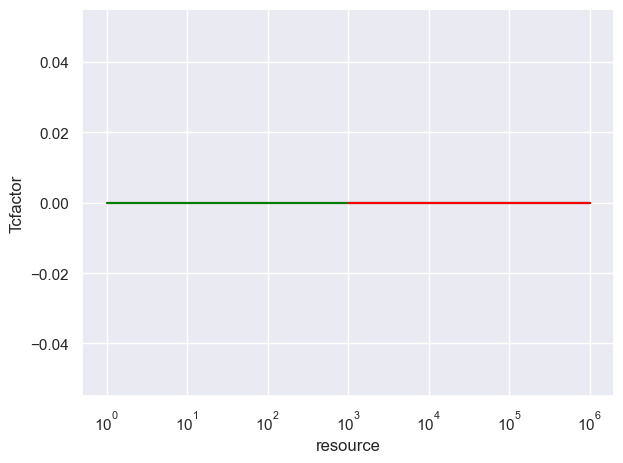

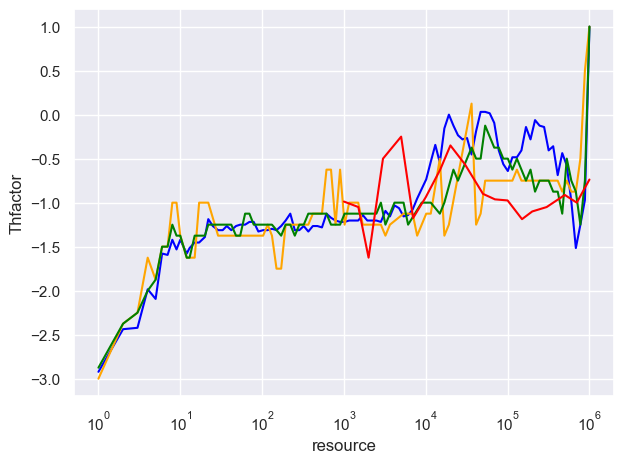

In [38]:
sb = skpleiades_setup(100)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.96, 1.))
p.show()

p_dict = sb.plot_parameters()

for k, p in p_dict.items():
    if k == 'sweep':
        p = p.scale(x='log', y='log')
    else:
        p = p.scale(x='log')
    p.show()

100%|███████████████████████████████████████████| 7600/7600 [02:38<00:00, 48.03it/s]


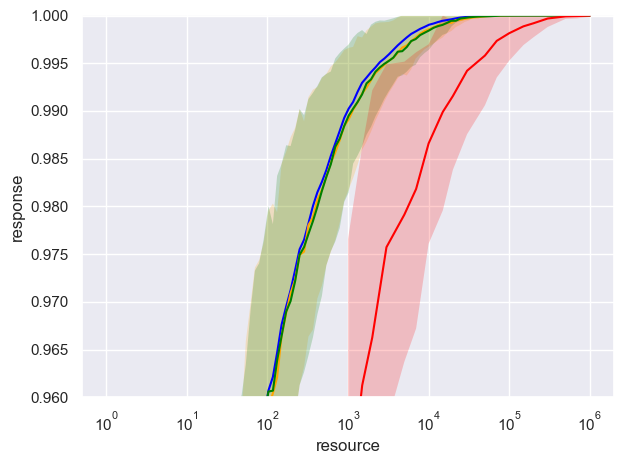

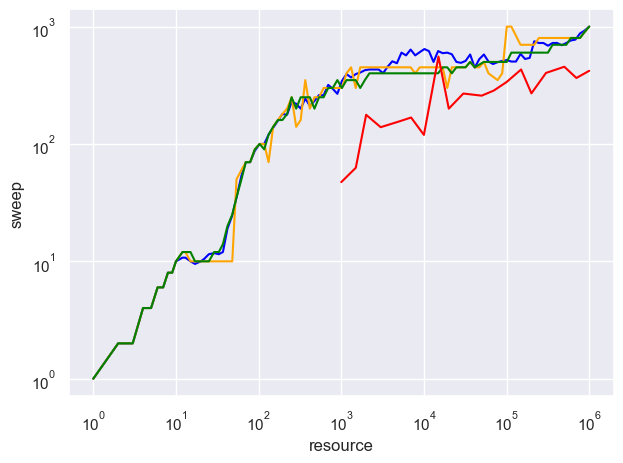

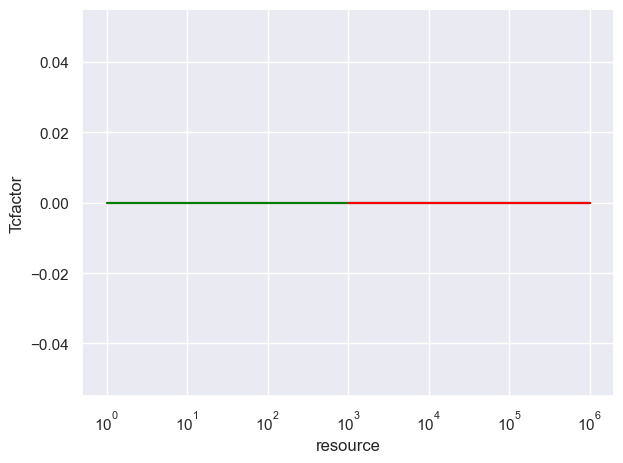

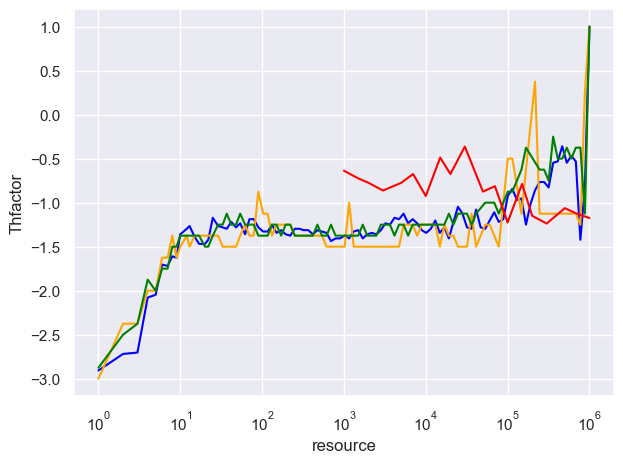

In [39]:
sb = skpleiades_setup(200)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.96, 1.))
p.show()

p_dict = sb.plot_parameters()

for k, p in p_dict.items():
    if k == 'sweep':
        p = p.scale(x='log', y='log')
    else:
        p = p.scale(x='log')
    p.show()

In [3]:
sb = wishart_setup(50, '0.50')
# p = sb.plot_performance()
# p = p.scale(x='log').limit(x=(10**3, 3.3 * 10**5), y=(0.935, 1.005))
# p.show()
# p.save(os.path.join(sb.here.plots, 'performance_plot.png'))
# p_dict = sb.plot_parameters()

# for p in p_dict.values():
#     p = p.scale(x='log').limit(x=(10**3, 10**6))
#     p.show()

No rows found for idx 101
No rows found for idx 102
No rows found for idx 103
No rows found for idx 104
No rows found for idx 105
No rows found for idx 106
No rows found for idx 107
No rows found for idx 108
No rows found for idx 109
No rows found for idx 110
No rows found for idx 111
No rows found for idx 112
No rows found for idx 113
No rows found for idx 114
No rows found for idx 115
No rows found for idx 116
No rows found for idx 117
No rows found for idx 118
No rows found for idx 119
No rows found for idx 120
No rows found for idx 121
No rows found for idx 122
No rows found for idx 123
No rows found for idx 124
No rows found for idx 125
No rows found for idx 126
No rows found for idx 127
No rows found for idx 128
No rows found for idx 129
No rows found for idx 130
No rows found for idx 131
No rows found for idx 132
No rows found for idx 133
No rows found for idx 134
No rows found for idx 135
No rows found for idx 136
No rows found for idx 137
No rows found for idx 138
No rows foun